# Вычислительное музыковедение: Модели и методы Music Data Mining

## Лабораторная работа №3.  Классификация музыкальных данных методами классического МО

### Работа с данными

Полезные ссылки:
1. http://ismir2001.ismir.net/pdf/tzanetakis.pdf
2. https://huggingface.co/datasets/marsyas/gtzan

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset("marsyas/gtzan")

GTZAN is a dataset for musical genre classification of audio signals. The dataset consists of 1,000 audio tracks, each of 30 seconds long. It contains 10 genres, each represented by 100 tracks. The tracks are all 22,050Hz Mono 16-bit audio files in WAV format. The genres are: blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, and rock.

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 999
    })
})

In [ ]:
dataset['train'][998]

{'file': '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244/genres/rock/rock.00099.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244/genres/rock/rock.00099.wav',
  'array': array([-0.02111816, -0.03451538, -0.03536987, ...,  0.00134277,
          0.00250244, -0.00186157]),
  'sampling_rate': 22050},
 'genre': 9}

In [ ]:
num2class = {
    0: 'blues',
    1: 'classical',
    2: 'country',
    3: 'disco',
    4: 'hiphop',
    5: 'jazz',
    6: 'metal',
    7: 'pop',
    8: 'reggae',
    9: 'rock'
}

In [ ]:
import IPython.display as ipd

idx = 222

print(dataset['train'][idx]['file'].split('/')[-1]) # num2class[...]
print(num2class.get(dataset['train'][idx]['genre'], 'Unknown')) # num2class[...]
ipd.Audio(dataset['train'][idx]['audio']['array'], rate=dataset['train'][idx]['audio']['sampling_rate'])

country.00022.wav
country


### Инстурмент Open SMILE

In [ ]:
!pip install opensmile

In [ ]:
signal = dataset['train'][idx]['audio']['array']
sr = dataset['train'][idx]['audio']['sampling_rate']

Извлекаемые множества признаки: https://audeering.github.io/opensmile-python/api/opensmile.FeatureSet.html

In [ ]:
import opensmile

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)
smile.feature_names

In [ ]:
smile.process_signal(
    signal, sr
)

,,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
start,end,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,0 days 00:00:00.020000,1.022170,-13.837646,19.467779,0.022693,-0.027534,0.349668,19.095894,23.398077,9.960184,-4.642103,...,0.000000,336.844330,1201.680664,-132.499771,1324.658569,813.927185,-137.460327,2508.428711,594.430481,-140.654846
0 days 00:00:00.010022676,0 days 00:00:00.030022676,0.926593,-13.994546,21.287294,0.022805,-0.024235,0.493799,20.757418,19.545120,9.336352,-0.881383,...,23.431078,345.934814,1196.950439,-63.190964,1317.796509,818.845642,-73.726135,2436.766357,611.715576,-80.156990
0 days 00:00:00.020045351,0 days 00:00:00.040045351,0.794908,-14.093396,22.846529,0.021088,-0.020114,0.695995,23.354574,14.369424,8.856368,2.132916,...,25.966497,362.577240,1146.884155,7.301015,1319.445923,788.014709,-9.652803,2384.275391,614.552002,-20.835981
0 days 00:00:00.030068027,0 days 00:00:00.050068027,0.736859,-16.116556,26.485987,0.022850,-0.015011,0.673433,28.693855,12.026611,10.132930,3.759389,...,27.920822,361.822601,1165.465210,10.187454,1307.851929,819.117188,-9.167827,2349.752686,680.167908,-18.758677
0 days 00:00:00.040090703,0 days 00:00:00.060090703,0.716083,-18.059561,29.910690,0.035115,-0.015959,0.676323,32.420551,11.142451,10.813828,2.856160,...,31.367371,372.233673,1154.952759,11.417629,1334.528320,839.511658,-10.403924,2383.637695,820.009766,-19.239479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:00:29.917687075,0 days 00:00:29.937687075,0.374032,-22.473776,27.678305,0.020221,-0.031669,0.224027,35.822865,15.203434,4.193106,6.656746,...,18.448881,911.485168,1243.395020,-6.055143,2055.259521,770.602051,-11.869481,3301.040771,1008.604492,-8.348729
0 days 00:00:29.927709751,0 days 00:00:29.947709751,0.368916,-22.770868,29.878822,0.042164,-0.029324,0.213694,36.390179,15.668056,3.511129,6.515526,...,10.766086,947.835999,1286.986328,-6.924269,2073.125000,780.071533,-10.634455,3335.458740,760.516602,-0.897207
0 days 00:00:29.937732426,0 days 00:00:29.957732426,0.426883,-19.142687,26.953560,0.048654,-0.026556,0.198515,31.165644,14.849351,9.933486,-2.979652,...,7.891603,961.212830,1272.176880,-7.205282,2090.739990,763.210999,-7.878637,3397.715576,689.757141,1.988894


In [ ]:
smile = opensmile.Smile()
result = smile.process_signal(
    signal, sr
)
result

,,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
start,end,,,,,,,,,,,,,,,,,,,,,
0 days,0 days 00:00:30.013333333,2.519101,0.17007,0.657851,0.785257,1.030075,1.346128,0.244818,0.316053,0.56087,0.357733,...,7.10078,0.447964,2.251065,2.252208,-20.0,0.698524,94.000664,47.584961,92.44622,49.175404


In [ ]:
result.to_numpy()

array([[ 2.5191014,  0.1700703,  0.6578507, ..., 47.58496  , 92.44622  ,
        49.175404 ]], dtype=float32)

### Подготовка датасета

In [ ]:
from tqdm import tqdm

smile = opensmile.Smile()

prepared_data = []

for idx in tqdm(range(len(dataset['train']))):
    signal = dataset['train'][idx]['audio']['array']
    sr = dataset['train'][idx]['audio']['sampling_rate']
    genre = dataset['train'][idx]['genre']
    features = smile.process_signal(signal, sr).to_numpy()[0]
    prepared_data.append({
        'id': idx,
        'features': features,
        'genre': genre
    })


100%|██████████| 999/999 [19:53<00:00,  1.20s/it]


In [ ]:
import numpy as np
# Сохранить
file_name = 'smile_features.npy'
np.save(file_name, prepared_data, allow_pickle=True) # Не забудьте закомментировать, чтобы не перезаписать или еще что.

# Извлечь
data = np.load(file_name, allow_pickle=True)
len(data)

999

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=111)

In [ ]:
len(train_data), len(test_data)

(699, 300)

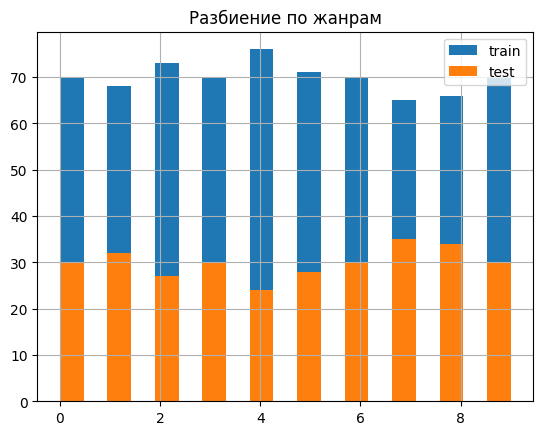

In [ ]:
import matplotlib.pyplot as plt

plt.hist([elem['genre'] for elem in train_data], 19, label='train')
plt.hist([elem['genre'] for elem in test_data], 19, label='test')
plt.legend()
plt.title('Разбиение по жанрам')
plt.grid()
plt.show()

### Классификация

Больше информации: https://scikit-learn.org/stable/modules/classes.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


tree_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    random_state=111
)
tree_clf

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=111)

In [ ]:
tree_clf.fit([elem['features'] for elem in train_data], [elem['genre'] for elem in train_data])

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=111)

#### Как можно посмотреть на решающие правила

In [ ]:
ruls = tree.export_text(tree_clf)
print(ruls)

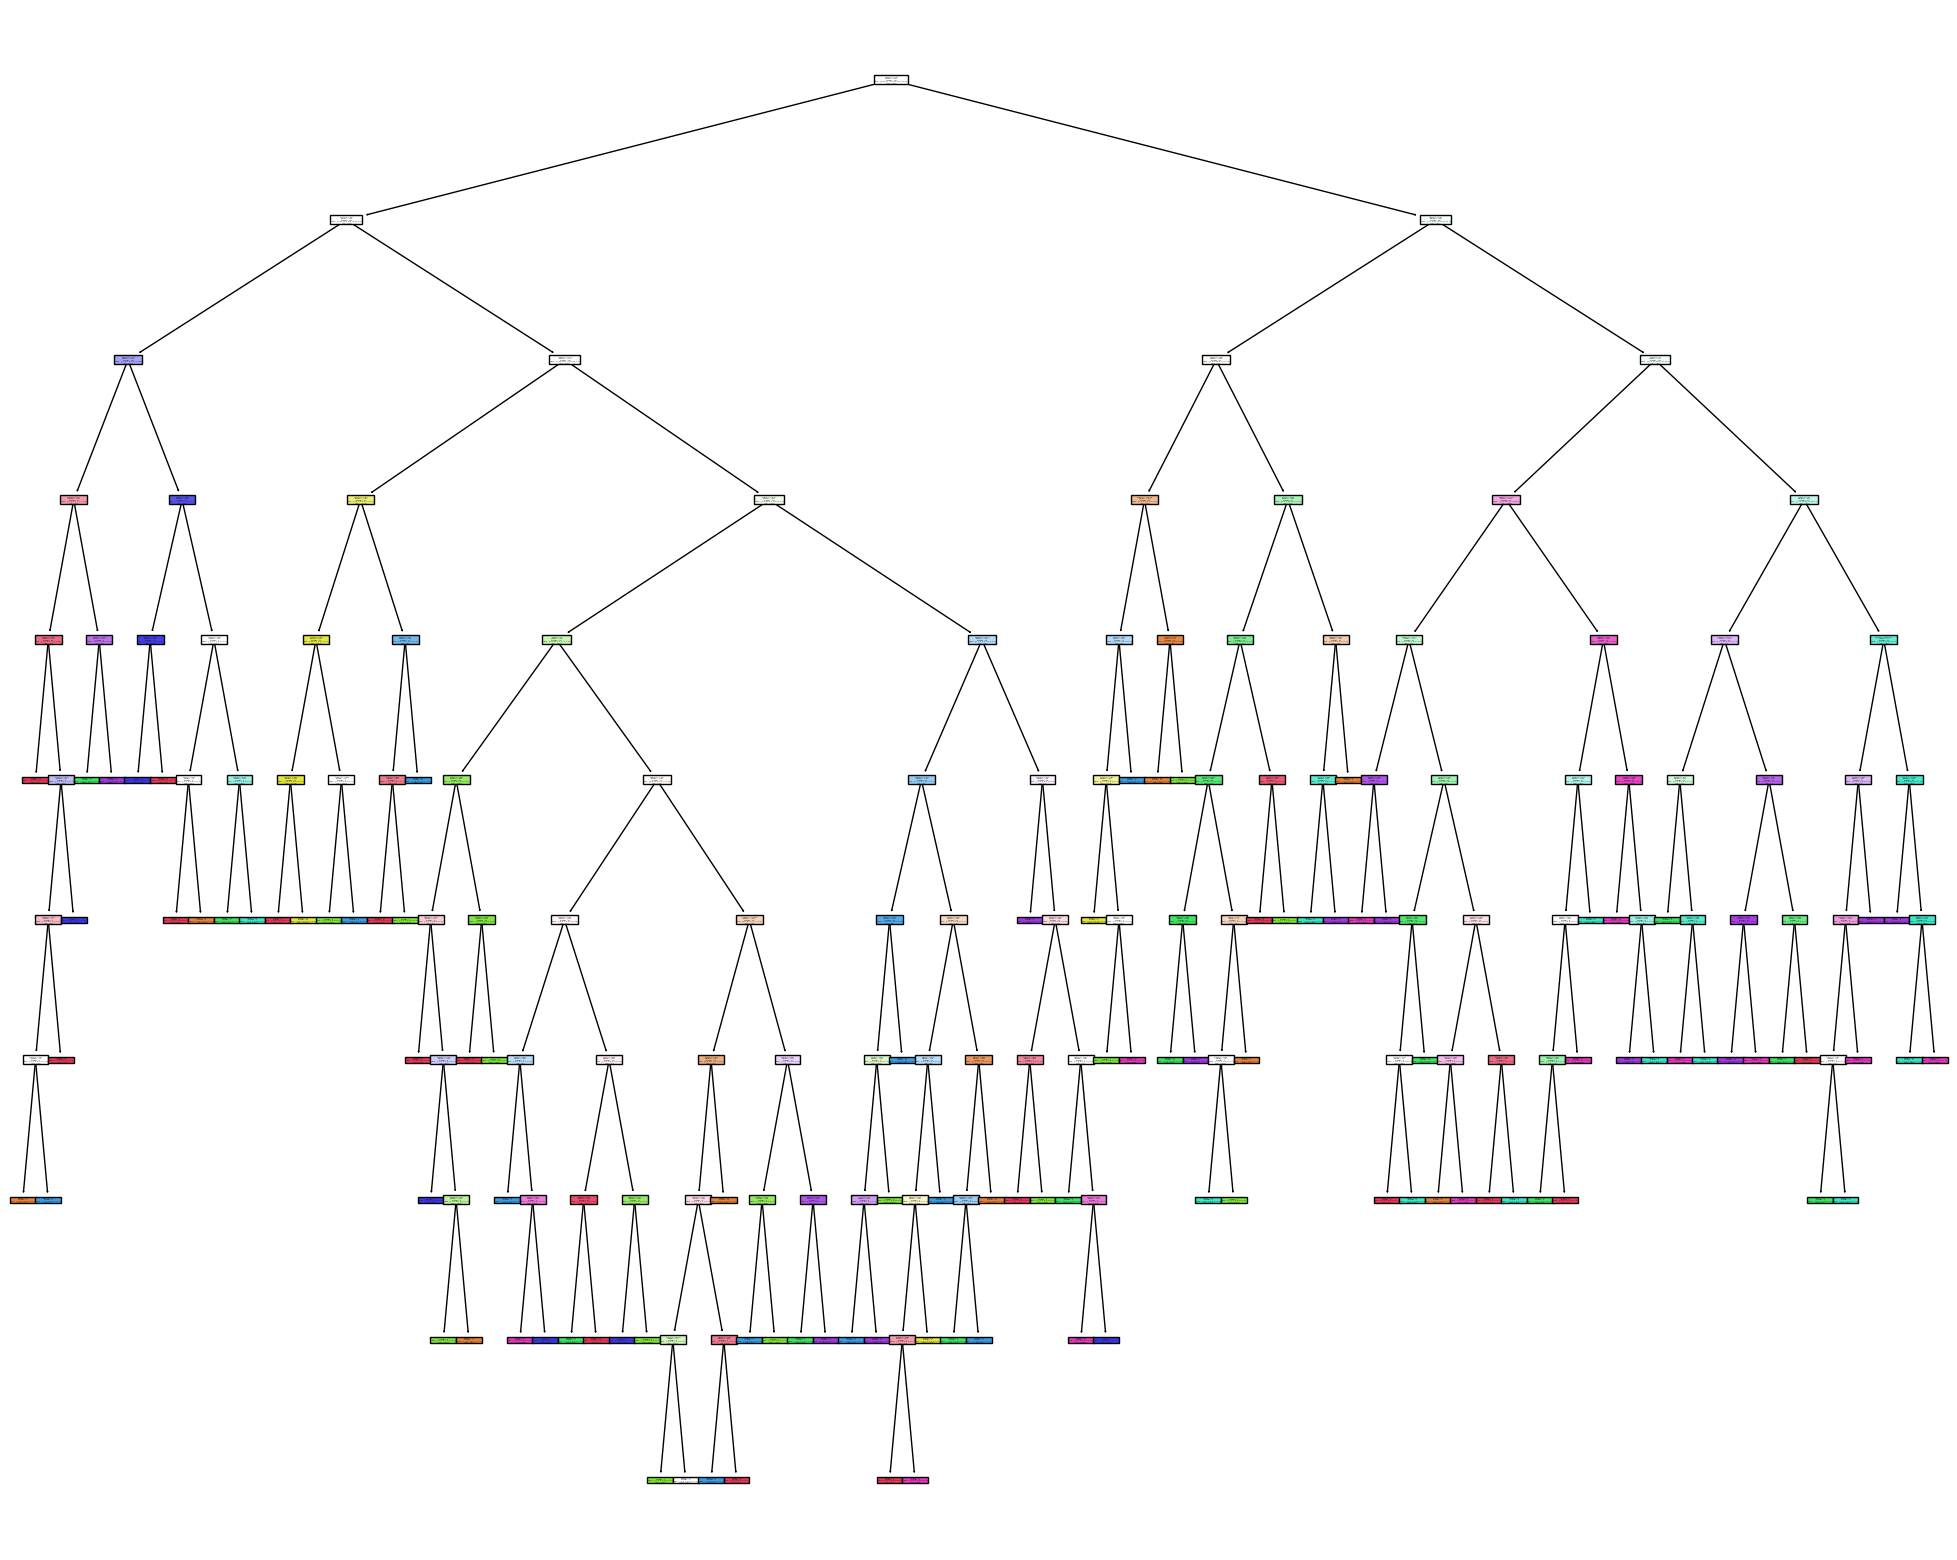

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf,
                   feature_names=None,
                   class_names=list(num2class.values()),
                   filled=True)


#### Аналитика результатов

In [ ]:
real_class = [elem['genre'] for elem in test_data]
predict_result = list(tree_clf.predict([elem['features'] for elem in test_data]))

https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(real_class, predict_result)

0.5333333333333333

In [ ]:
from sklearn.metrics import recall_score

recall_score(real_class, predict_result, average='micro'), recall_score(real_class, predict_result, average='macro')

(0.5333333333333333, 0.5360562558356675)

In [ ]:
from sklearn.metrics import precision_score

precision_score(real_class, predict_result, average='micro'), precision_score(real_class, predict_result, average='macro')

(0.5333333333333333, 0.5553289822241382)

In [ ]:
from sklearn.metrics import f1_score

f1_score(real_class, predict_result, average='micro'), f1_score(real_class, predict_result, average='macro')

(0.5333333333333333, 0.5410403151584664)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(real_class, predict_result))

              precision    recall  f1-score   support

           0       0.45      0.47      0.46        30
           1       0.93      0.81      0.87        32
           2       0.54      0.56      0.55        27
           3       0.33      0.47      0.38        30
           4       0.52      0.62      0.57        24
           5       0.70      0.57      0.63        28
           6       0.69      0.67      0.68        30
           7       0.56      0.40      0.47        35
           8       0.62      0.53      0.57        34
           9       0.23      0.27      0.25        30

    accuracy                           0.53       300
   macro avg       0.56      0.54      0.54       300
weighted avg       0.56      0.53      0.54       300


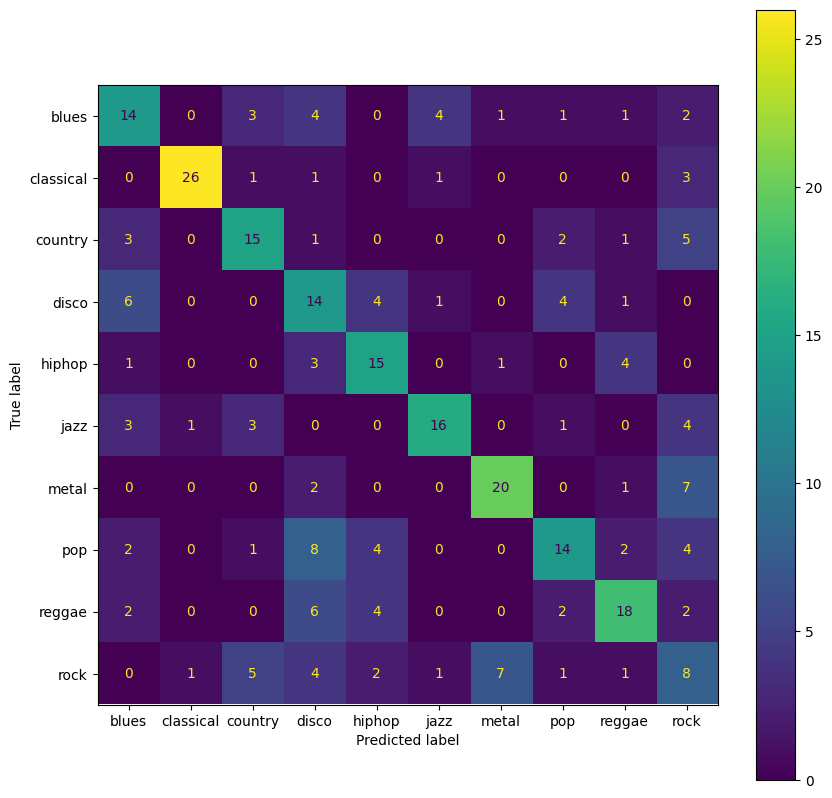

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true_name = [num2class[i] for i in real_class]
y_pred_name = [num2class[i] for i in predict_result]


plt.rcParams['figure.figsize'] = [10, 10]
cm = confusion_matrix(y_true_name, y_pred_name, labels=list(num2class.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(num2class.values()))
disp.plot()
plt.show()

### Задание на лабораторную работу (10 баллов)

1. Произвести подготовку данных (извлечь признаки с помощью open SMILE)
2. Обучить 3 различных классификатора (для каждого классификатора поиграться с гиперпараметрами, 2 эксперимента на классификатор)
3. Расчитать метрики: acc, f-1 и третья - на ваш выбор
4. Для каждого эксперемента произвести анализ confuision matrix
5. В конце создать итоговую таблицу с эксперминетами и результатами. Сделать выводы.
6. Цель - получить метрику классификации выше, чем в примере.

In [ ]:
# Ваш код